<a href="https://colab.research.google.com/github/aeyage/CPC251-MachineLearning/blob/main/CPC251_Project__Part1_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Instruction
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- Describe the steps in the "Description:" field.

#### Group Information

Group No: Cancer 06

- Member 1: Aiman Hakimi (153153)
- Member 2: Marcus Chan Jun Hao ()
- Member 3: Ooi Zhun Shen ()
- Member 4: Chan Yee Shuen ()


#### Import libraries

In [120]:
%config Completer.use_jedi=False

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # processes numerical data / linear algebra

# generates graphs
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.tools as tls
import plotly.offline as py
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

#### Load the dataset

In [121]:
# read cervical cancer dataset into dataframe ccr1 (makeshift variable to be concatenated later on)  
ccr1 = pd.read_csv("C:/Users/Aiman Hakimi/Downloads/risk_factors.csv")

#### Split the dataset
Split the dataset into training, validation and test sets.

In [122]:
from sklearn.model_selection import train_test_split

""" Biopsy is a perfect candidate to be the predictive target as the definitive test to diagnose 
    cervical cancer because it allows for a direct evaluation of abnormal cells or cancerous changes """
target = 'Biopsy'

# split the dataset into features (X) and labels (y)
X = ccr1.drop(columns=target, axis=1) # might need to drop other tests too i.e Dx:Cancer, Dx:CIN etc
y = ccr1[target]

# 70% of the data is for training, 20% for validation, and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,
                                                    stratify=y, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f'Feature Training Set shape: {X_train.shape}')
print(f'Feature Validation Set shape: {X_val.shape}')
print(f'Target Testing Set shape: {X_test.shape}')

Feature Training Set shape: (617, 35)
Feature Validation Set shape: (155, 35)
Target Testing Set shape: (86, 35)


In [ ]:
""" ccr1[target].value_counts() # check the distribution of the target variable """

In [ ]:
""" plt.figure(figsize=(40, 10)) # plot the distribution of the target variable
ccr1[target].hist() """

In [ ]:
""" from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # initialise SMOTE object with seed 42
X_train.sm, y_train.sm = sm.fit_resample(X_train, y_train) # resample the training set """

In [ ]:
""" y_train_sm.value_counts() """

#### Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:

As we have split the data set above, we will now preprocess (finding, cleansing, organising) it before 
proceeding with taking care of the NaNs (missing values), categorical features, label encoding, normalisation etc.

In [ ]:
ccr1.shape ## print the dimension (rows, columns) of the data set

In [ ]:
ccr1.head(10) ## print the first 10 rows of the data set

In [ ]:
ccr1.tail(10) ## print the last 10 rows of the data set

In [ ]:
ccr1.describe() ## print the descriptive statistics of the data set

In [ ]:
ccr1.columns ## print the column names of the data set

In [123]:
# a function to replace '?' with NaN
ccr2 = ccr1.replace('?', np.nan)

In [124]:
ccr2.apply(lambda x: sum(x.isnull()), axis=0) ## print the number of missing values in each column

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<Axes: >

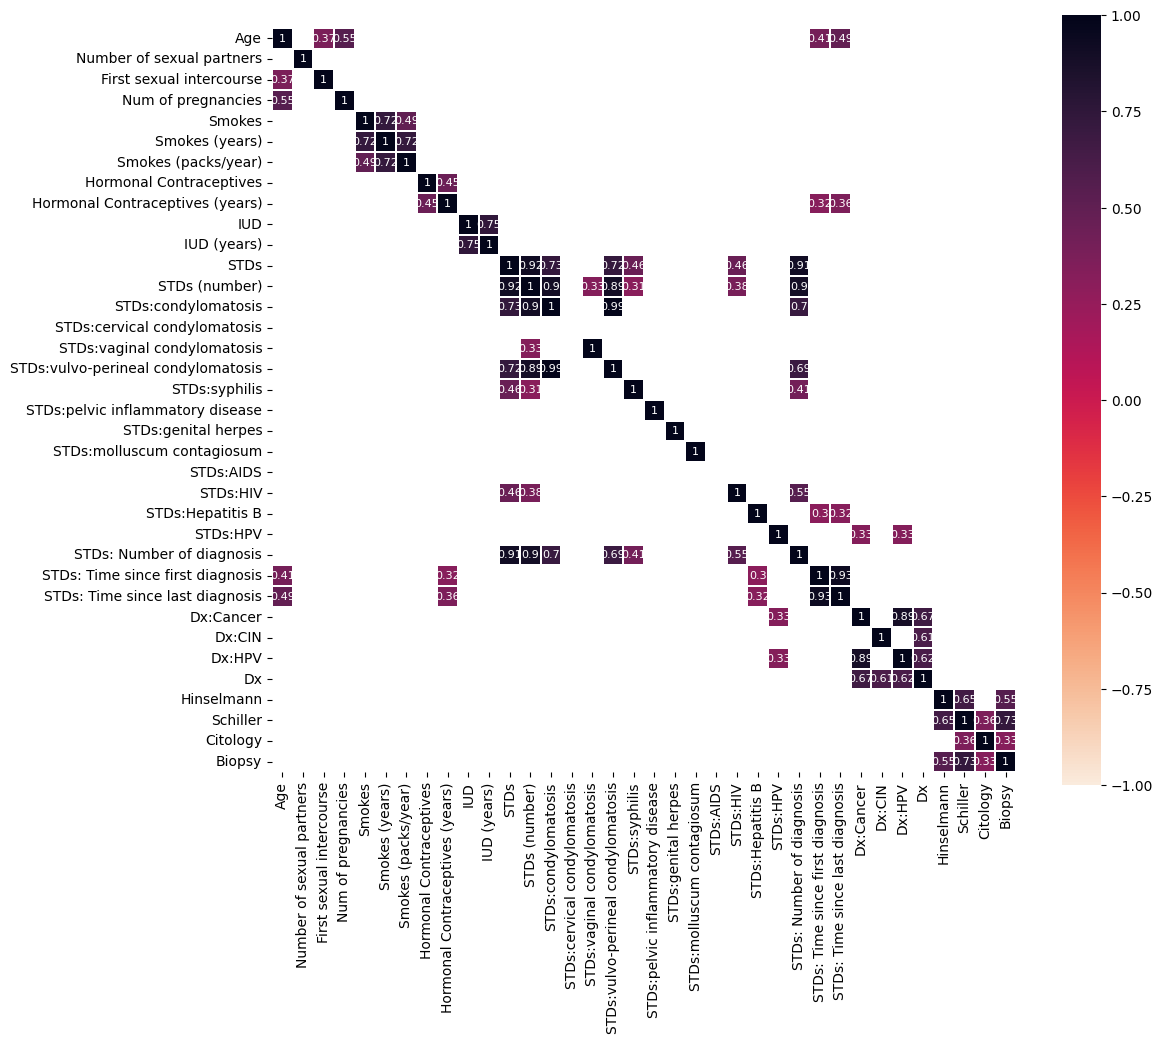

In [125]:
# a correlation matrix to check for multicollinearity
corr = ccr2.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr>=0.3) | (corr<=-0.3)], cmap='rocket_r', vmax=1.0, vmin=-1.0, 
            linewidths=0.1, annot=True, annot_kws={"size":8}, square=True)

In [126]:
# drop columns with low correlations w.r.t. the target
ccr2 = ccr2.drop(['Number of sexual partners', 'STDs:cervical condylomatosis',
                          'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
                          'STDs:molluscum contagiosum', 'STDs:AIDS'], axis=1)

In [127]:
ccr2 = ccr2.drop_duplicates() ## drop duplicate rows from the data set

In [128]:
ccrnum = ccr2.select_dtypes(include="number") # assign all numerical columns to ccrnum
ccrnum.dtypes

Age                          int64
STDs: Number of diagnosis    int64
Dx:Cancer                    int64
Dx:CIN                       int64
Dx:HPV                       int64
Dx                           int64
Hinselmann                   int64
Schiller                     int64
Citology                     int64
Biopsy                       int64
dtype: object

In [129]:
ccrcat = ccr2.select_dtypes(include="object") # assign all categorical columns to ccrcat

In [130]:
ccrcat1 = ccrcat.apply(pd.to_numeric) # convert all categorical columns to numerical
ccrcat1.dtypes

First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:HIV                              float64
STDs:Hepatitis B                      float64
STDs:HPV                              float64
STDs: Time since first diagnosis      float64
STDs: Time since last diagnosis       float64
dtype: object

In [131]:
ccr = pd.concat([ccrnum, ccrcat1], axis=1, join='inner') # concatenate ccrnum and ccrcat1

In [133]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(fill_value=np.nan, strategy='mean') # impute missing values with mean
ccr12 = pd.DataFrame(imp.fit_transform(ccr))
ccr12.columns = ccr.columns

In [134]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
ccr12.iloc[:, 1:-1] = scaler.fit_transform(ccr12.iloc[:, 1:-1])

In [135]:
ccr12['Cancer Result'] = ['1' if i == 1 else '0' for i in ccr12[target]]

In [136]:
ccr12['Cancer Result'].value_counts()

Cancer Result
0    745
1     54
Name: count, dtype: int64

In [ ]:
ccr12.info() ## print a concise summary of the preprocessed dataset

#### Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

In [ ]:
# the feature options here are deducted by 1 because the ID column is not included 
print(f"Number of features available for selection: {ccr.shape[1] - 1}")

In [137]:
# re-assign X and y after preprocessing
X1 = ccr12.drop([target], axis=1)
y1 = ccr12[target]

In [138]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bfs = SelectKBest(score_func=chi2, k=10) # create SelectKBest instance called bfs (best features)
fit = bfs.fit(X1, y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X1.columns)

fs = pd.concat([dfcolumns, dfscores], axis=1) # concat two dataframes as fs (feature scores) for better visualisation
fs.columns = ['Best Features', 'Score']  # naming the dataframe columns

print(fs.nlargest(10, 'Score'))  # print top 10 best features

    Best Features       Score
29  Cancer Result  745.000000
7        Schiller  384.671468
6      Hinselmann  232.283814
8        Citology   73.305309
2       Dx:Cancer   20.172458
4          Dx:HPV   20.172458
5              Dx   19.123590
24       STDs:HIV   10.567517
3          Dx:CIN   10.086229
18           STDs    6.837064


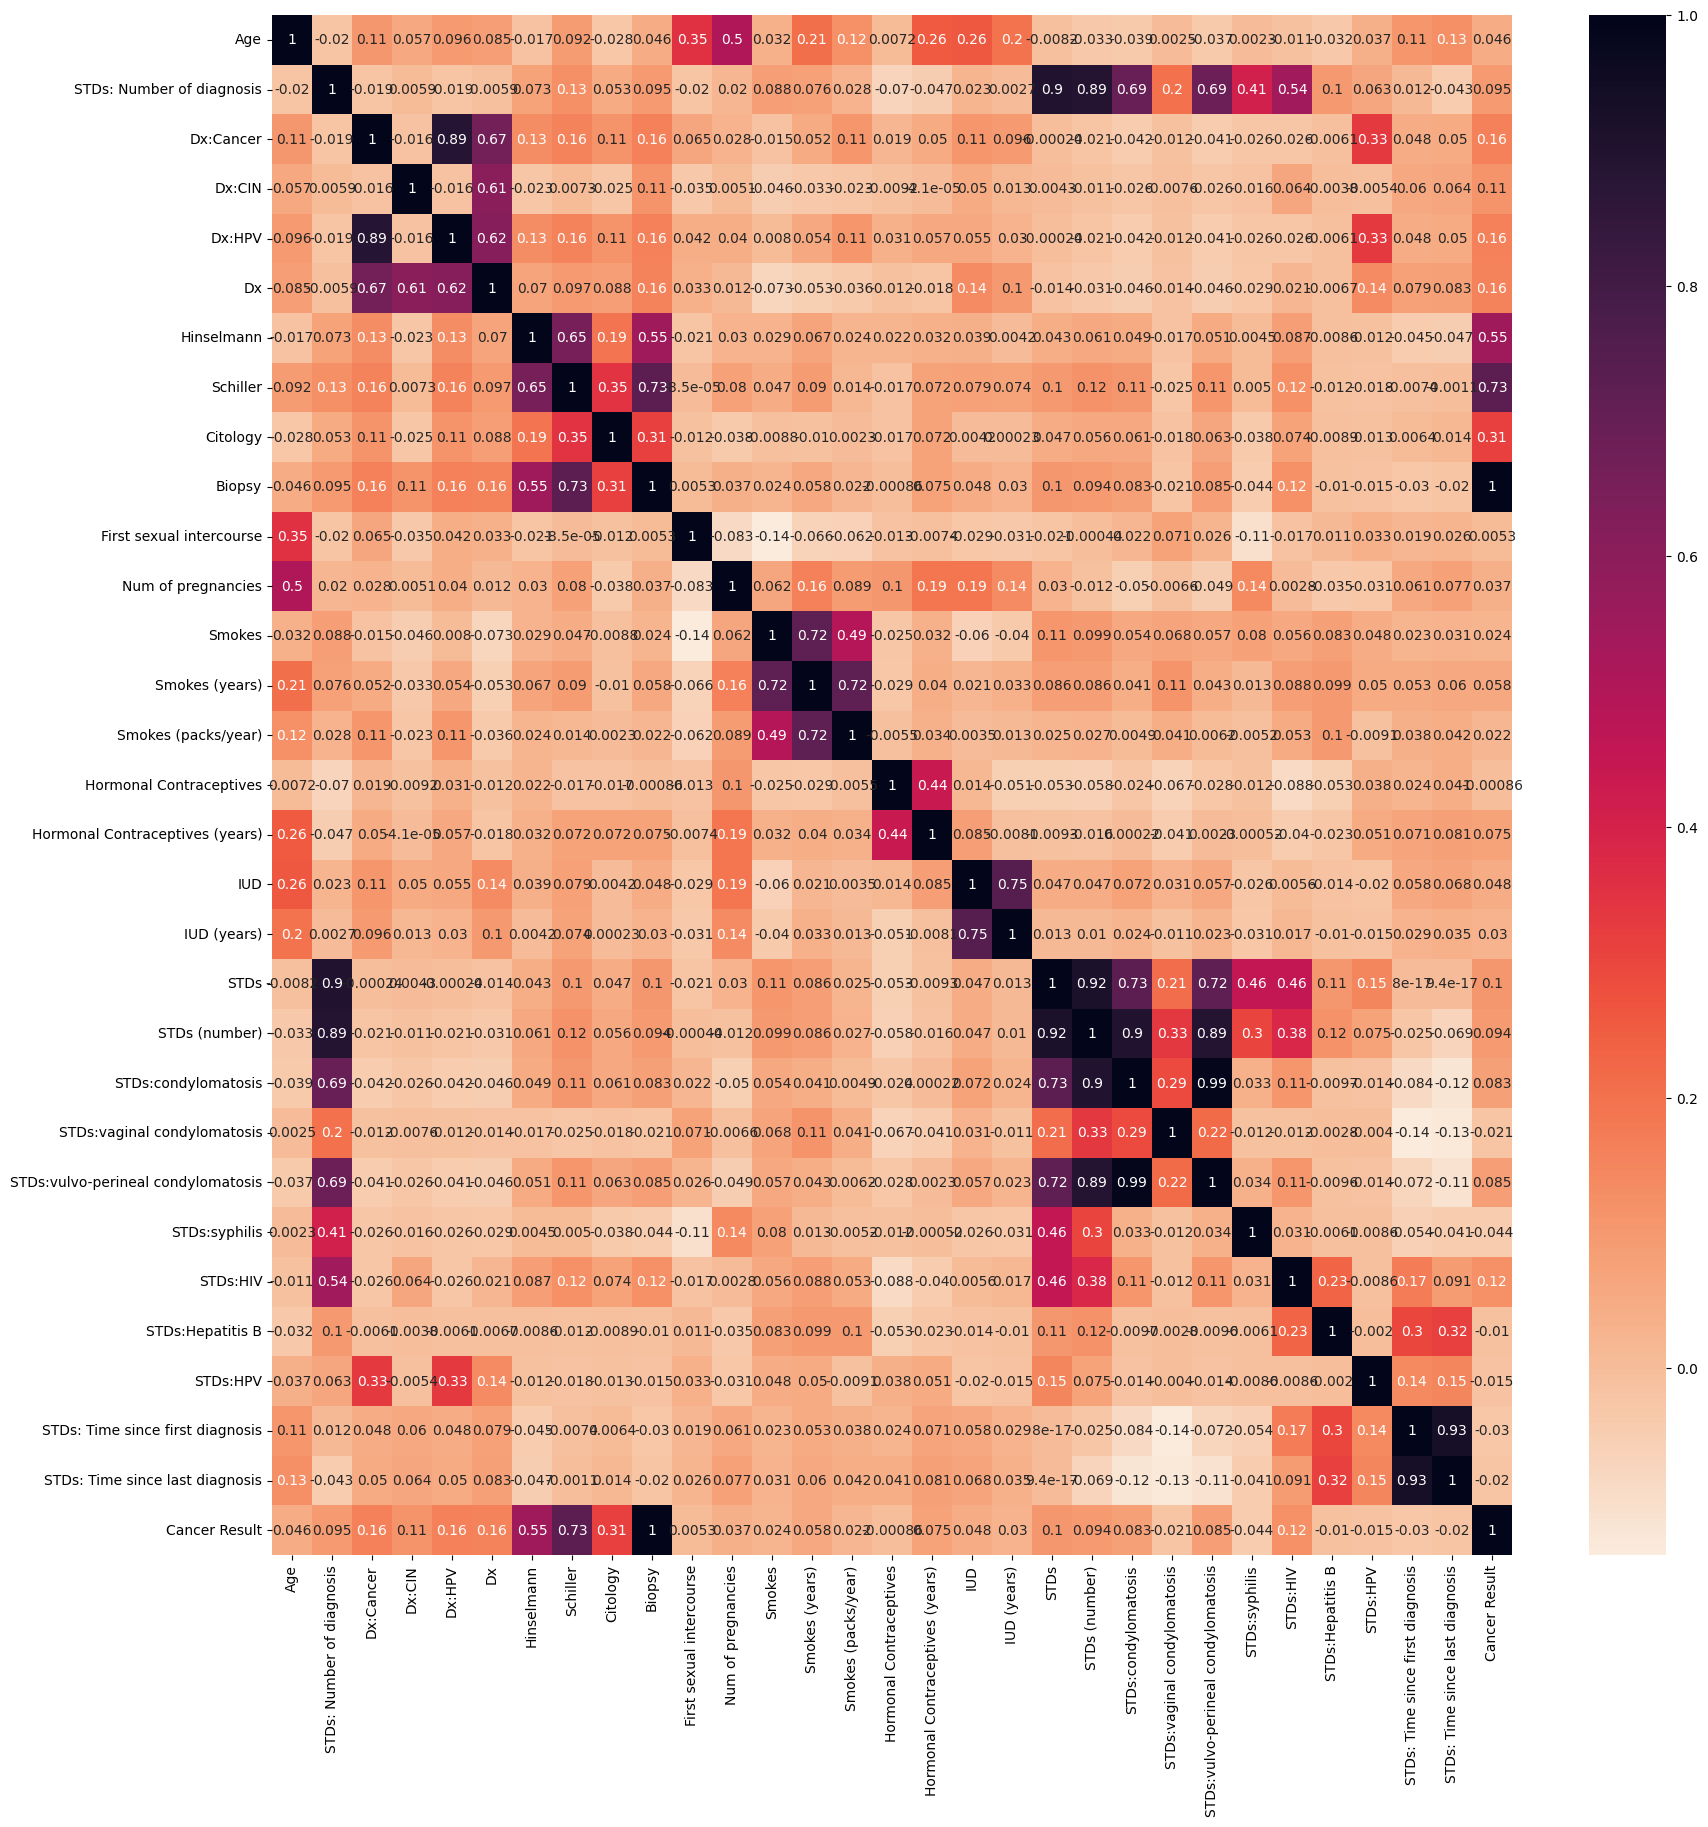

In [139]:
# get correlations of each features in the dataset
corrmat = ccr12.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))

#plot heat map
g = sns.heatmap(ccr12[top_corr_features].corr(), annot=True, cmap="rocket_r")

#### Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description:

Each model must be trained and fitted using the training set based on the best features from the feature selection. The model with the best performance (champion model) will be picked out from one of the models proposed.

Model 1: k-Nearest Neighbors (kNN)

kNN Model 1.1: Fit the model with features and target

We need re-split the dataset to reflect the modified data set after preprocessing

In [140]:
# split the dataset into features (X) and labels (y)
X = ccr12.drop(columns=target, axis=1) # might need to drop other tests too i.e Dx:Cancer, Dx:CIN etc
y = ccr12[target]

# 70% of the data is for training, 20% for validation, and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,
                                                                stratify=y, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # get the most suitable value of parameter C
from sklearn import metrics

In [142]:
kmodel1 = KNeighborsClassifier()

In [150]:
# calculate the accuracy of models with different values of k
k_acc1 = np.zeros(30)
for i in range(1, 31):
    kmodel1 = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    yhat = kmodel1.predict(X_test)
    k_acc1[i-1] = metrics.accuracy_score(y_test, yhat)

k_acc1

array([0.9625, 0.95  , 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375,
       0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375,
       0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375,
       0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375])

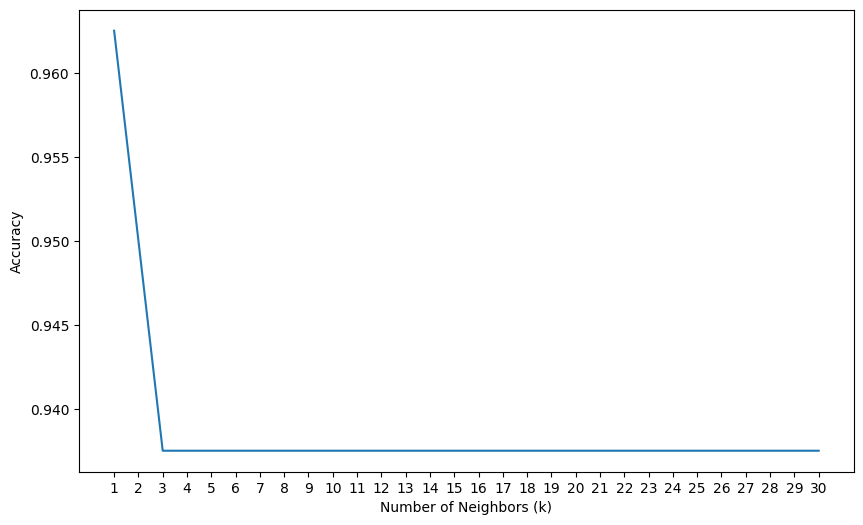

In [153]:
loc = np.arange(1, 31, step=1.0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), k_acc1)
plt.xticks(loc)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [146]:
params = {"n_neighbors": range(1, 2), 
              "weights": ["uniform", "distance"],
              "metric": ["euclidean", "manhattan", "minkowski"]}
model1gs = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=3, n_jobs=-1) 
model1gs.fit(X_train, y_train)
print(model1gs.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [147]:
kmodel1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute', metric='manhattan')

In [148]:
kmodel1.fit(X_train, y_train)
pred1_1 = kmodel1.predict(X_test)
train_pred1_1 = kmodel1.predict(X_train)

kNN Model 1.2: Fit the model with the top 3 features (Schiller, Hinselmann, Citology) and target

In [149]:
kmodel1_2 = KNeighborsClassifier()

In [151]:
# calculate the accuracy of models with different values of k
k_acc2 = np.zeros(30)
for i in range(1, 31):
    kmodel1_2 = KNeighborsClassifier(n_neighbors=i).fit(X_train[['Schiller', 'Hinselmann', 'Citology']], y_train)
    yhat = kmodel1_2.predict(X_test[['Schiller', 'Hinselmann', 'Citology']])
    k_acc2[i-1] = metrics.accuracy_score(y_test, yhat)

k_acc2

array([0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
       0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
       0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
       0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625])

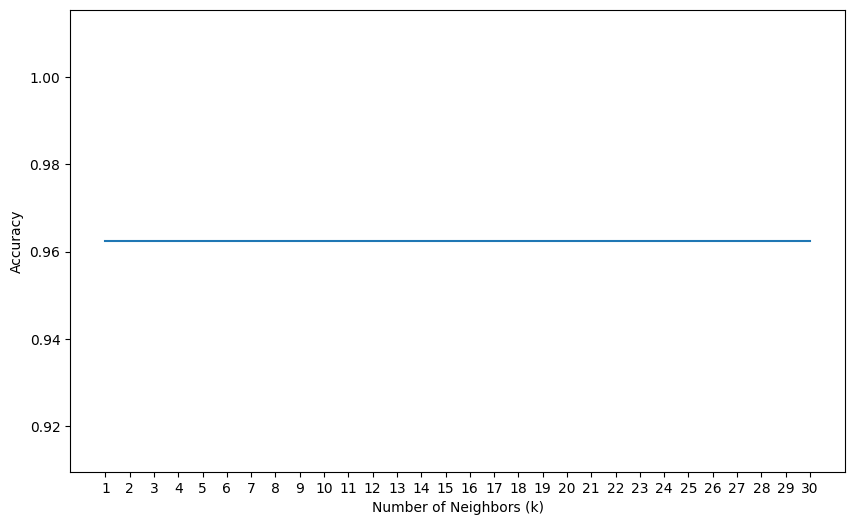

In [152]:
loc = np.arange(1, 31, step=1.0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), k_acc2)
plt.xticks(loc)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [154]:
params = {"n_neighbors": range(1, 30), 
              "weights": ["uniform", "distance"],
              "metric": ["euclidean", "manhattan", "minkowski"]}
model1gs2 = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=3, n_jobs=-1) 
model1gs2.fit(X_train[['Schiller', 'Hinselmann', 'Citology']], y_train)
print(model1gs2.best_params_)

Fitting 3 folds for each of 174 candidates, totalling 522 fits
{'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'uniform'}


In [155]:
kmodel1_2 = KNeighborsClassifier(n_neighbors=17, weights='uniform', algorithm='brute', metric='euclidean')

In [156]:
kmodel1_2.fit(X_train[['Schiller', 'Hinselmann', 'Citology']], y_train)
pred1_2 = kmodel1_2.predict(X_test[['Schiller', 'Hinselmann', 'Citology']])
train_pred1_2 = kmodel1_2.predict(X_train[['Schiller', 'Hinselmann', 'Citology']])

kNN Model 1.3: Fit the model with the top 2 features (Schiller & Hinselmann) and target

In [157]:
kmodel1_3 = KNeighborsClassifier()

In [165]:
# calculate the accuracy of models with different values of k
k_acc3 = np.zeros(30)
for i in range(1, 31): 
    kmodel1_3 = KNeighborsClassifier(n_neighbors=i).fit(X_train[['Schiller', 'Hinselmann']], y_train)
    yhat = kmodel1_3.predict(X_test[['Schiller', 'Hinselmann']])
    k_acc3[i-1] = metrics.accuracy_score(y_test, yhat)

k_acc3

array([0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
       0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
       0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
       0.9625, 0.975 , 0.9625, 0.9625, 0.9625, 0.9625])

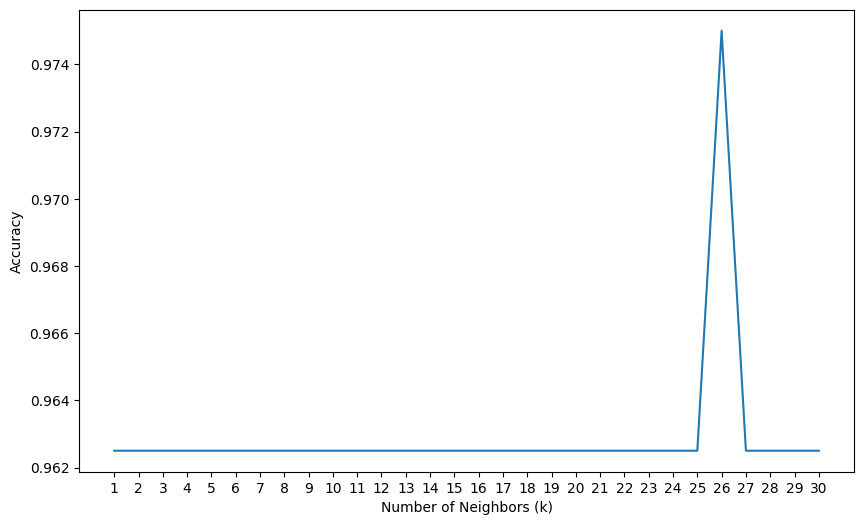

In [159]:
loc = np.arange(1, 31, step=1.0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), k_acc3)
plt.xticks(loc)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [160]:
params = {"n_neighbors": range(26, 27), 
              "weights": ["uniform", "distance"],
              "metric": ["euclidean", "manhattan", "minkowski"]}
model1gs3 = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=3, n_jobs=-1) 
model1gs3.fit(X_train[['Schiller', 'Hinselmann']], y_train)
print(model1gs3.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'metric': 'euclidean', 'n_neighbors': 26, 'weights': 'distance'}


In [161]:
kmodel1_3 = KNeighborsClassifier(n_neighbors=26, weights='distance', algorithm='brute', metric='euclidean')

In [162]:
kmodel1_3.fit(X_train[['Schiller', 'Hinselmann']], y_train)
pred1_3 = kmodel1_3.predict(X_test[['Schiller', 'Hinselmann']])
train_pred1_3 = kmodel1_3.predict(X_train[['Schiller', 'Hinselmann']])

kNN Model 1.4: Fit the model with the best feature (Schiller) and target

In [163]:
kmodel1_4 = KNeighborsClassifier()

In [164]:
# calculate the accuracy of models with different values of k
k_acc4 = np.zeros(30)
for i in range(1, 31):
    kmodel1_4 = KNeighborsClassifier(n_neighbors=i).fit(X_train[['Schiller']], y_train)
    yhat = kmodel1_4.predict(X_test[['Schiller']])
    k_acc4[i-1] = metrics.accuracy_score(y_test, yhat)

k_acc4

array([0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
       0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
       0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625,
       0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625])

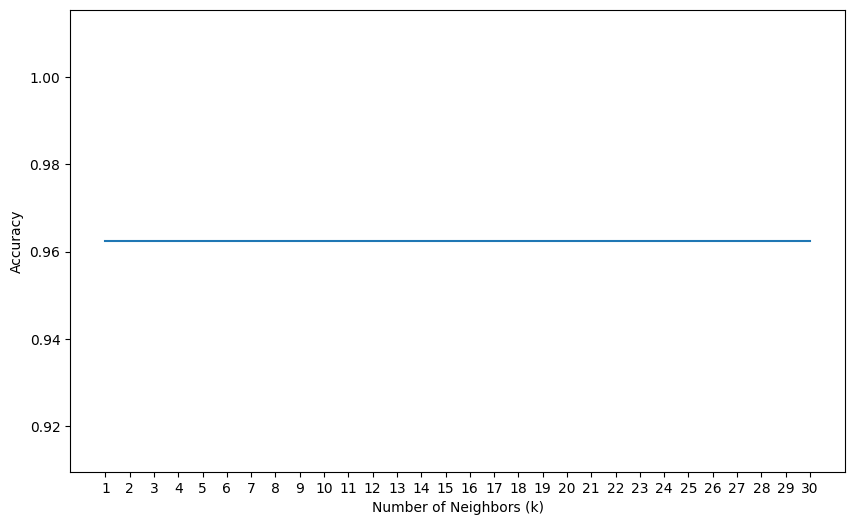

In [166]:
loc = np.arange(1, 31, step=1.0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), k_acc4)
plt.xticks(loc)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [167]:
params = {"n_neighbors": range(1, 30), 
              "weights": ["uniform", "distance"],
              "metric": ["euclidean", "manhattan", "minkowski"]}
model1gs4 = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=3, n_jobs=-1) 
model1gs4.fit(X_train[['Schiller']], y_train)
print(model1gs4.best_params_)

Fitting 3 folds for each of 174 candidates, totalling 522 fits
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [168]:
kmodel1_4 = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='brute', metric='euclidean')

In [169]:
kmodel1_4.fit(X_train[['Schiller']], y_train)
pred1_4 = kmodel1_4.predict(X_test[['Schiller']])
train_pred1_4 = kmodel1_4.predict(X_train[['Schiller']])

Model 2: Decision Tree (DT)

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

DT Model 2.1: Fit the model on features and target

In [171]:
parameter = {"max_depth": range(1,6), "max_features": range(1,10),"criterion": ["gini", "entropy"]}
model2gs = GridSearchCV(DecisionTreeClassifier(random_state=152), parameter, cv=5)
model2gs.fit(X_train, y_train)
print(model2gs.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 7}


In [172]:
""" Bagging uses the bootstrap resampling technique to generate accurate but diverse component classifiers, 
which is effective on any unstable method such as decision tree """
bagging_model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=4, max_features=7, criterion='entropy'), 
                                   n_estimators=100, 
                                   max_features=7)

In [173]:
bagging_model2.fit(X_train, y_train)
pred2_1 = bagging_model2.predict(X_test)
train_pred2_1 = bagging_model2.predict(X_train)

DT Model 2.2: Fit the model on the top 3 features (Schiller, Hinselmann, Citology) and target

In [174]:
parameter = {"max_depth": range(1,6), "max_features": range(1,10),"criterion": ["gini", "entropy"]}
model2gs2 = GridSearchCV(DecisionTreeClassifier(random_state=152), parameter, cv=5)
model2gs2.fit(X_train[['Schiller', 'Hinselmann', 'Citology']], y_train)
print(model2gs2.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'max_features': 1}


In [175]:
bagging_model2_2 = BaggingClassifier(DecisionTreeClassifier(max_depth=1, max_features=1, criterion='gini'), 
                                     n_estimators=100, 
                                     max_features=1)

In [176]:
bagging_model2_2.fit(X_train[['Schiller', 'Hinselmann', 'Citology']], y_train)
pred2_2 = bagging_model2_2.predict(X_test[['Schiller', 'Hinselmann', 'Citology']])
train_pred2_2 = bagging_model2_2.predict(X_train[['Schiller', 'Hinselmann', 'Citology']])

DT Model 2.3: Fit the model on the top 2 features (Schiller, Hinselmann) and target

In [177]:
parameter = {"max_depth": range(1,6), "max_features": range(1,10),
             "criterion": ["gini", "entropy"]}
model2gs3 = GridSearchCV(DecisionTreeClassifier(random_state=152), parameter, cv=5)
model2gs3.fit(X_train[['Schiller', 'Hinselmann']], y_train)
print(model2gs3.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'max_features': 1}


In [178]:
bagging_model2_3 = BaggingClassifier(DecisionTreeClassifier(max_depth=1, max_features=1, criterion='gini'), 
                                     n_estimators=100, 
                                     max_features=1)

In [179]:
bagging_model2_3.fit(X_train[['Schiller', 'Hinselmann']], y_train)
pred2_3 = bagging_model2_3.predict(X_test[['Schiller', 'Hinselmann']])
train_pred2_3 = bagging_model2_3.predict(X_train[['Schiller', 'Hinselmann']])

DT Model 2.4: Fit the model on the best feature (Schiller) and target

In [180]:
parameter = {"max_depth": range(1,6), "max_features": range(1,10),"criterion": ["gini", "entropy"]}
model2gs4 = GridSearchCV(DecisionTreeClassifier(random_state=152), parameter, cv=5)
model2gs4.fit(X_train[['Schiller']], y_train)
print(model2gs4.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'max_features': 1}


In [181]:
bagging_model2_4 = BaggingClassifier(DecisionTreeClassifier(max_depth=1, max_features=1, criterion='gini'), 
                                     n_estimators=100, 
                                     max_features=1)

In [182]:
bagging_model2_4.fit(X_train[['Schiller']], y_train)
pred2_4 = bagging_model2_4.predict(X_test[['Schiller']])
train_pred2_4 = bagging_model2_4.predict(X_train[['Schiller']])

Model 3: XGBoost

#### Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description:

In [183]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

Model 1: k-Nearest Neighbors (kNN)

kNN Model 1.1: Fit the model with features and target

In [184]:
print(f"Accuracy: {accuracy_score(y_test, pred1_1)}")
print(f'Recall: {recall_score(y_test, pred1_1, average="weighted")}')
print(f'Precision: {precision_score(y_test, pred1_1, average="weighted")}')
print(f"F1 score: {f1_score(y_test, pred1_1, average='weighted')}")
print()
cm = confusion_matrix(y_test, pred1_1)
print(f"Confusion matrix: ")
print(cm)
print()
print(f"Training set accuracy: {metrics.accuracy_score(y_train, train_pred1_1)}")
print(f"Test set accuracy: {metrics.accuracy_score(y_test, pred1_1)}")
print()
score1_1 = cross_val_score(kmodel1, X, y, cv=5)
print(f"kNN Model 1 accuracy: {np.mean(score1_1)}")

Accuracy: 0.9875
Recall: 0.9875
Precision: 0.9876644736842104
F1 score: 0.9868469462840324

Confusion matrix: 
[[75  0]
 [ 1  4]]

Training set accuracy: 1.0
Test set accuracy: 0.9875

kNN Model 1 accuracy: 0.9324213836477988


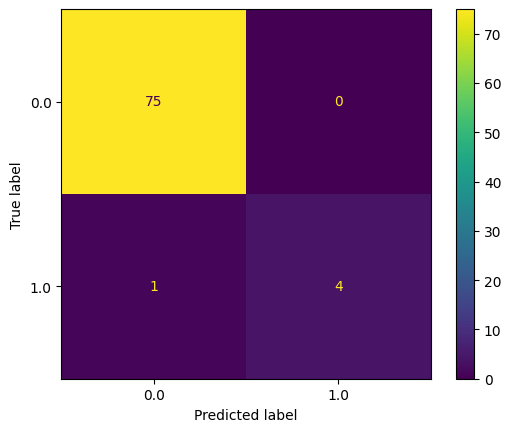

In [185]:
cm = confusion_matrix(y_test, pred1_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kmodel1.classes_)
disp.plot()
plt.show()

kNN Model 1.2: Fit the model with the top 3 features (Schiller, Hinselmann, Citology) and target

In [186]:
print(f"Accuracy: {accuracy_score(y_test, pred1_2)}")
print(f'Recall: {recall_score(y_test, pred1_2, average="weighted")}')
print(f'Precision: {precision_score(y_test, pred1_2, average="weighted")}')
print(f"F1 score: {f1_score(y_test, pred1_2, average='weighted')}")
print()
cm = confusion_matrix(y_test, pred1_2)
print(f"Confusion matrix: ")
print(cm)
print()
print(f"Training set accuracy: {metrics.accuracy_score(y_train, train_pred1_2)}")
print(f"Test set accuracy: {metrics.accuracy_score(y_test, pred1_2)}")
print()
score1_2 = cross_val_score(kmodel1_2, X, y, cv=5)
print(f"kNN Model 2 accuracy: {np.mean(score1_2)}")

Accuracy: 0.9625
Recall: 0.9625
Precision: 0.959703947368421
F1 score: 0.9605408388520971

Confusion matrix: 
[[74  1]
 [ 2  3]]

Training set accuracy: 0.9582608695652174
Test set accuracy: 0.9625

kNN Model 2 accuracy: 0.9324213836477988


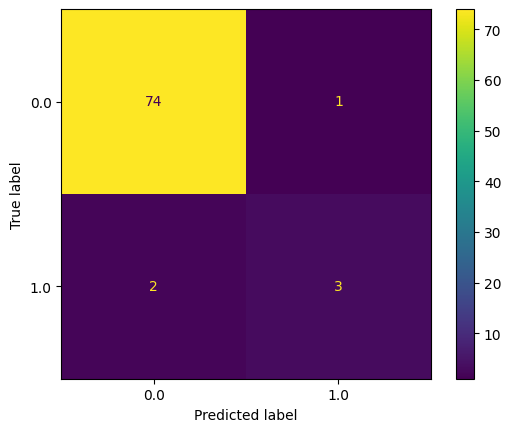

In [187]:
cm = confusion_matrix(y_test, pred1_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kmodel1_2.classes_)
disp.plot()
plt.show()

kNN Model 1.3: Fit the model with the top 2 features (Schiller, Hinselmann) and target

In [188]:
print(f"Accuracy: {accuracy_score(y_test, pred1_3)}")
print(f'Recall: {recall_score(y_test, pred1_3, average="weighted")}')
print(f'Precision: {precision_score(y_test, pred1_3, average="weighted")}')
print(f"F1 score: {f1_score(y_test, pred1_3, average='weighted')}")
print()
cm = confusion_matrix(y_test, pred1_3)
print(f"Confusion matrix: ")
print(cm)
print()
print(f"Training set accuracy: {metrics.accuracy_score(y_train, train_pred1_3)}")
print(f"Test set accuracy: {metrics.accuracy_score(y_test, pred1_3)}")
print()
score1_3 = cross_val_score(kmodel1_3, X, y, cv=5)
print(f"kNN Model 3 accuracy: {np.mean(score1_3)}")

Accuracy: 0.9625
Recall: 0.9625
Precision: 0.9765625
F1 score: 0.9664442700156984

Confusion matrix: 
[[72  3]
 [ 0  5]]

Training set accuracy: 0.9547826086956521
Test set accuracy: 0.9625

kNN Model 3 accuracy: 0.9324213836477988


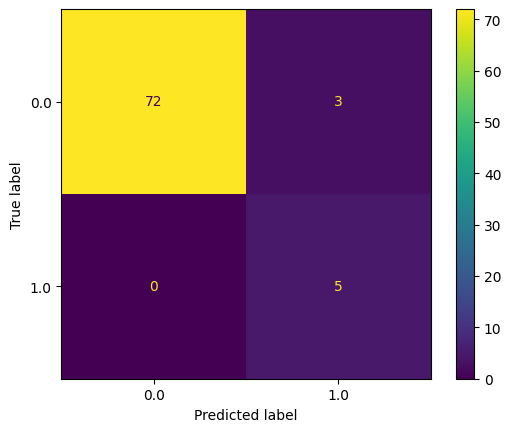

In [189]:
cm = confusion_matrix(y_test, pred1_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kmodel1_3.classes_)
disp.plot()
plt.show()

kNN Model 1.4: Fit the model with the best feature (Schiller) and target

In [190]:
print(f"Accuracy: {accuracy_score(y_test, pred1_4)}")
print(f'Recall: {recall_score(y_test, pred1_4, average="weighted")}')
print(f'Precision: {precision_score(y_test, pred1_4, average="weighted")}')
print(f"F1 score: {f1_score(y_test, pred1_4, average='weighted')}")
print()
cm = confusion_matrix(y_test, pred1_4)
print(f"Confusion matrix: ")
print(cm)
print()
print(f"Training set accuracy: {metrics.accuracy_score(y_train, train_pred1_4)}")
print(f"Test set accuracy: {metrics.accuracy_score(y_test, pred1_4)}")
print()
score1_4 = cross_val_score(kmodel1_4, X, y, cv=5)
print(f"kNN Model 4 accuracy: {np.mean(score1_4)}")

Accuracy: 0.9625
Recall: 0.9625
Precision: 0.9765625
F1 score: 0.9664442700156984

Confusion matrix: 
[[72  3]
 [ 0  5]]

Training set accuracy: 0.9547826086956521
Test set accuracy: 0.9625

kNN Model 4 accuracy: 0.9499371069182392


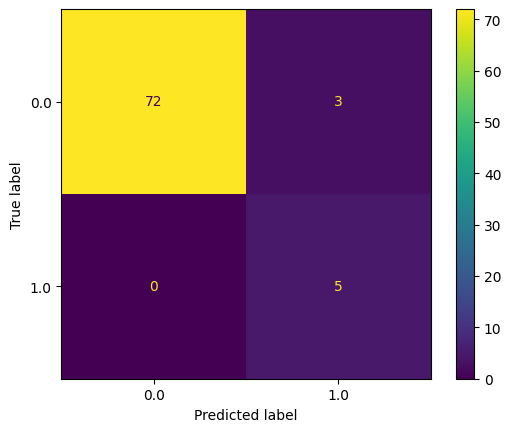

In [191]:
cm = confusion_matrix(y_test, pred1_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kmodel1_4.classes_)
disp.plot()
plt.show()

Model 2: Decision Tree (DT)

DT Model 2.1: Fit the model with features and target

In [192]:
print(f"Accuracy: {accuracy_score(y_test, pred2_1)}")
print(f'Recall: {recall_score(y_test, pred2_1, average="weighted")}')
print(f'Precision: {precision_score(y_test, pred2_1, average="weighted")}')
print(f"F1 score: {f1_score(y_test, pred2_1, average='weighted')}")
print()
cm = confusion_matrix(y_test, pred2_1)
print(f"Confusion matrix: ")
print(cm)
print()
print(f"Training set accuracy: {metrics.accuracy_score(y_train, train_pred2_1)}")
print(f"Test set accuracy: {metrics.accuracy_score(y_test, pred2_1)}")
print()
score2_1 = cross_val_score(bagging_model2, X, y, cv=5)
print(f"DT Model 1 accuracy: {np.mean(score2_1)}")

Accuracy: 0.9625
Recall: 0.9625
Precision: 0.9639423076923077
F1 score: 0.9548319327731093

Confusion matrix: 
[[75  0]
 [ 3  2]]

Training set accuracy: 0.9634782608695652
Test set accuracy: 0.9625

DT Model 1 accuracy: 0.9524292452830189


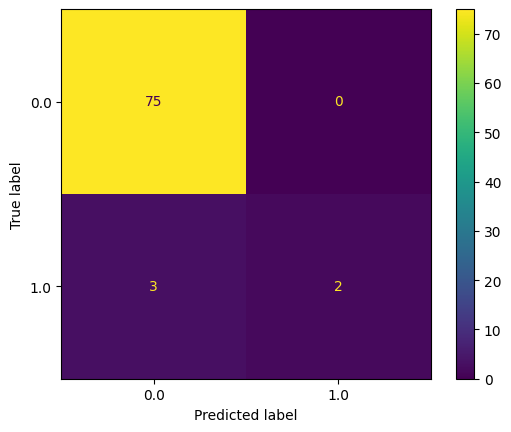

In [193]:
cm = confusion_matrix(y_test, pred2_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_model2.classes_)
disp.plot()
plt.show()

DT Model 2.2: Fit the model with the top 3 features (Schiller, Hinselmann, Citology) and target

In [194]:
print(f"Accuracy: {accuracy_score(y_test, pred2_2)}")
print(f'Recall: {recall_score(y_test, pred2_2, average="weighted")}')
print(f'Precision: {precision_score(y_test, pred2_2, average="weighted")}')
print(f"F1 score: {f1_score(y_test, pred2_2, average='weighted')}")
print()
cm = confusion_matrix(y_test, pred2_2)
print(f"Confusion matrix: ")
print(cm)
print()
print(f"Training set accuracy: {metrics.accuracy_score(y_train, train_pred2_2)}")
print(f"Test set accuracy: {metrics.accuracy_score(y_test, pred2_2)}")
print()
score2_2 = cross_val_score(bagging_model2_2, X, y, cv=5)
print(f"DT Model 2 accuracy: {np.mean(score2_2)}")

Accuracy: 0.9375
Recall: 0.9375
Precision: 0.87890625
F1 score: 0.907258064516129

Confusion matrix: 
[[75  0]
 [ 5  0]]

Training set accuracy: 0.9373913043478261
Test set accuracy: 0.9375

DT Model 2 accuracy: 0.9324213836477988


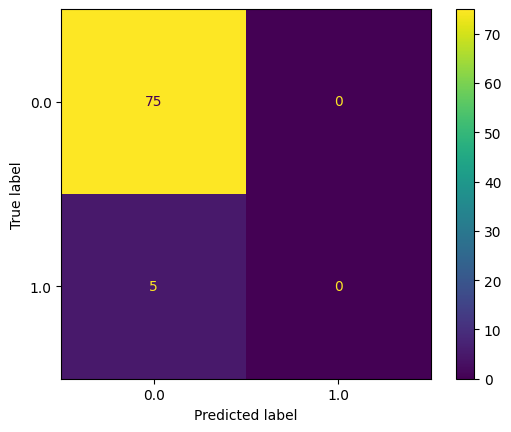

In [195]:
cm = confusion_matrix(y_test, pred2_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_model2_2.classes_)
disp.plot()
plt.show()

DT Model 2.3: Fit the model with the top 2 features (Schiller, Hinselmann) and target

In [196]:
print(f"Accuracy: {accuracy_score(y_test, pred2_3)}")
print(f'Recall: {recall_score(y_test, pred2_3, average="weighted")}')
print(f'Precision: {precision_score(y_test, pred2_3, average="weighted")}')
print(f"F1 score: {f1_score(y_test, pred2_3, average='weighted')}")
print()
cm = confusion_matrix(y_test, pred2_3)
print(f"Confusion matrix: ")
print(cm)
print()
print(f"Training set accuracy: {metrics.accuracy_score(y_train, train_pred2_3)}")
print(f"Test set accuracy: {metrics.accuracy_score(y_test, pred2_3)}")
print()
score2_3 = cross_val_score(bagging_model2_3, X, y, cv=5)
print(f"DT Model 3 accuracy: {np.mean(score2_3)}")

Accuracy: 0.975
Recall: 0.975
Precision: 0.9756493506493505
F1 score: 0.9720394736842104

Confusion matrix: 
[[75  0]
 [ 2  3]]

Training set accuracy: 0.9478260869565217
Test set accuracy: 0.975

DT Model 3 accuracy: 0.9324213836477988


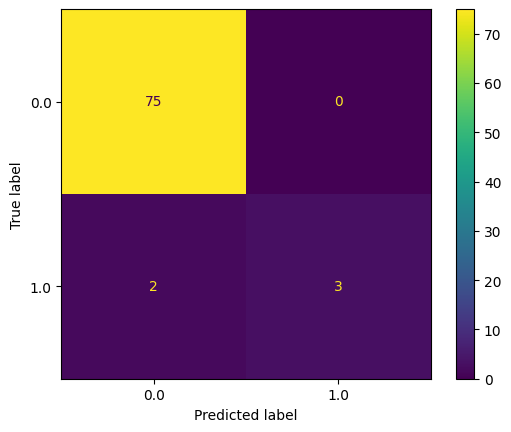

In [197]:
cm = confusion_matrix(y_test, pred2_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_model2_3.classes_)
disp.plot()
plt.show()

DT Model 2.4: Fit the model with the best feature (Schiller) and target

In [198]:
print(f"Accuracy: {accuracy_score(y_test, pred2_4)}")
print(f'Recall: {recall_score(y_test, pred2_4, average="weighted")}')
print(f'Precision: {precision_score(y_test, pred2_4, average="weighted")}')
print(f"F1 score: {f1_score(y_test, pred2_4, average='weighted')}")
print()
cm = confusion_matrix(y_test, pred2_4)
print(f"Confusion matrix: ")
print(cm)
print()
print(f"Training set accuracy: {metrics.accuracy_score(y_train, train_pred2_4)}")
print(f"Test set accuracy: {metrics.accuracy_score(y_test, pred2_4)}")
print()
score2_4 = cross_val_score(bagging_model2_4, X, y, cv=5)
print(f"DT Model 4 accuracy: {np.mean(score2_4)}")

Accuracy: 0.9625
Recall: 0.9625
Precision: 0.9765625
F1 score: 0.9664442700156984

Confusion matrix: 
[[72  3]
 [ 0  5]]

Training set accuracy: 0.9547826086956521
Test set accuracy: 0.9625

DT Model 4 accuracy: 0.9324213836477988


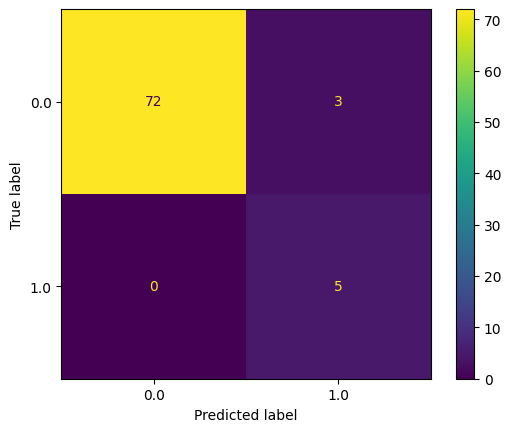

In [199]:
cm = confusion_matrix(y_test, pred2_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_model2_4.classes_)
disp.plot()
plt.show()